**Table of contents**<a id='toc0_'></a>    
- [preparatory work](#toc1_)    
    - [Please ensure that you are running the following code using Python 3.8.18. Additionally, verify that all required libraries have been properly installed.](#toc1_1_1_)    
    - [Make sure the model is trained when running "our model" section](#toc1_1_2_)    
- [model comparison](#toc2_)    
  - [XGBoost](#toc2_1_)    
    - [model](#toc2_1_1_)    
    - [model evaluation](#toc2_1_2_)    
    - [plot](#toc2_1_3_)    
  - [LightGBM](#toc2_2_)    
    - [model](#toc2_2_1_)    
    - [model evaluation](#toc2_2_2_)    
    - [plot](#toc2_2_3_)    
  - [RF](#toc2_3_)    
    - [model](#toc2_3_1_)    
    - [model evaluation](#toc2_3_2_)    
    - [plot](#toc2_3_3_)    
  - [our model](#toc2_4_)    
    - [model](#toc2_4_1_)    
    - [model evaluation](#toc2_4_2_)    
    - [plot](#toc2_4_3_)    
  - [CatBoost](#toc2_5_)    
    - [model](#toc2_5_1_)    
    - [model evaluation](#toc2_5_2_)    
    - [plot](#toc2_5_3_)    
  - [SVM](#toc2_6_)    
    - [model](#toc2_6_1_)    
    - [model evaluation](#toc2_6_2_)    
    - [plot](#toc2_6_3_)    
  - [DT](#toc2_7_)    
    - [model](#toc2_7_1_)    
    - [model evaluation](#toc2_7_2_)    
    - [plot](#toc2_7_3_)    
  - [AdaBoost-LR](#toc2_8_)    
    - [model](#toc2_8_1_)    
    - [model evaluation](#toc2_8_2_)    
    - [plot](#toc2_8_3_)    
  - [Bagging-SVM](#toc2_9_)    
    - [model](#toc2_9_1_)    
    - [model evaluation](#toc2_9_2_)    
    - [plot](#toc2_9_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[preparatory work](#toc0_)
### <a id='toc1_1_1_'></a>[Please ensure that you are running the following code using Python 3.8. Additionally, verify that all required libraries have been properly installed.](#toc0_)
### <a id='toc1_1_2_'></a>[Make sure the model is trained when running "our model" section](#toc0_)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
from sklearn.metrics import mean_absolute_percentage_error

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# <a id='toc2_'></a>[model comparison](#toc0_)

In [2]:
# data reading
data = pd.read_csv('E:/aabc\myDeepTree\data-240321/sgpTP21.csv')
data = data.replace(-9999, float('nan'))
data.iloc[:, 0] = pd.to_numeric(data.iloc[:, 0], errors='coerce')
data = data.dropna()
data.columns = [
     'BS_B', 'BS_G', 'BS_R', 'AE_BG', 'AE_BR', 'AE_GR', 'BBS_B', 'BBS_G', 'BBS_R',
    'BSF_B', 'BSF_G', 'BSF_R', 'g_B', 'g_G', 'g_R', 'SSA_B', 'SSA_G', 'SSA_R', 
    'TR_B', 'TR_G', 'TR_R', 'RH', 'BA_B', 'BA_G', 'BA_R','CCN'
]
data

,BS_B,BS_G,BS_R,AE_BG,AE_BR,AE_GR,BBS_B,BBS_G,BBS_R,BSF_B,...,SSA_G,SSA_R,TR_B,TR_G,TR_R,RH,BA_B,BA_G,BA_R,CCN
0,43.159378,32.873775,20.416563,2.076402,2.259556,2.411959,4.657223,3.972297,3.306433,0.107908,...,0.929365,0.909551,0.724439,0.779187,0.831896,53.825000,3.683812,3.058201,2.394383,0.000000
1,41.750015,32.088740,20.824280,2.007528,2.090924,2.160319,4.692184,3.994470,2.954104,0.112388,...,0.928578,0.911376,0.723776,0.778570,0.831359,54.300000,3.629480,3.010897,2.393225,0.000000
2,42.130474,31.954027,20.211250,2.108808,2.209259,2.292844,4.482520,3.843897,3.313872,0.106396,...,0.929742,0.912281,0.723128,0.777963,0.830829,53.133330,3.530699,2.958819,2.302380,0.000000
3,41.326084,31.567007,20.493525,2.054719,2.104971,2.146785,4.566241,3.934870,2.914941,0.110493,...,0.928693,0.911936,0.722495,0.777367,0.830313,53.533333,3.494263,2.958578,2.341061,0.000000
4,40.897648,30.978632,19.532179,2.118737,2.223053,2.309854,4.530799,3.660422,3.148163,0.110784,...,0.935095,0.917695,0.721881,0.776787,0.829809,51.850002,3.171204,2.679318,2.098852,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728948,5.385745,4.396246,3.392887,1.548425,1.364981,1.212338,0.671493,0.640184,0.514532,0.124680,...,0.848164,0.849899,0.651316,0.699742,0.753117,17.466667,0.996367,0.838645,0.645862,247.710011
728949,6.156305,5.041541,3.635393,1.523715,1.583064,1.632448,0.936615,0.803642,0.951859,0.152139,...,0.848593,0.841401,0.651155,0.699593,0.752984,17.600000,1.145672,0.959065,0.734431,249.111098
728952,6.648797,5.497541,4.352057,1.450262,1.248510,1.080632,0.980080,1.053014,1.061275,0.147407,...,0.844928,0.848537,0.650630,0.699100,0.752537,17.783333,1.306583,1.071775,0.835994,254.526510
728953,6.622446,5.573394,4.833484,1.315449,0.901117,0.556353,0.756845,0.829249,1.159335,0.114285,...,0.845310,0.841636,0.650436,0.698920,0.752375,17.733334,1.276868,1.079658,0.969621,255.458028


In [3]:
def remove_outliers(df):
    # Remove outliers using the 3-sigma rule
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        cutoff = std * 3
        lower = mean - cutoff
        upper = mean + cutoff
        df = df[(df[column] > lower) & (df[column] < upper)]
    return df

# Apply function to remove outliers
data = remove_outliers(data)
data


,BS_B,BS_G,BS_R,AE_BG,AE_BR,AE_GR,BBS_B,BBS_G,BBS_R,BSF_B,...,SSA_G,SSA_R,TR_B,TR_G,TR_R,RH,BA_B,BA_G,BA_R,CCN
0,43.159378,32.873775,20.416563,2.076402,2.259556,2.411959,4.657223,3.972297,3.306433,0.107908,...,0.929365,0.909551,0.724439,0.779187,0.831896,53.825000,3.683812,3.058201,2.394383,0.000000
1,41.750015,32.088740,20.824280,2.007528,2.090924,2.160319,4.692184,3.994470,2.954104,0.112388,...,0.928578,0.911376,0.723776,0.778570,0.831359,54.300000,3.629480,3.010897,2.393225,0.000000
2,42.130474,31.954027,20.211250,2.108808,2.209259,2.292844,4.482520,3.843897,3.313872,0.106396,...,0.929742,0.912281,0.723128,0.777963,0.830829,53.133330,3.530699,2.958819,2.302380,0.000000
3,41.326084,31.567007,20.493525,2.054719,2.104971,2.146785,4.566241,3.934870,2.914941,0.110493,...,0.928693,0.911936,0.722495,0.777367,0.830313,53.533333,3.494263,2.958578,2.341061,0.000000
4,40.897648,30.978632,19.532179,2.118737,2.223053,2.309854,4.530799,3.660422,3.148163,0.110784,...,0.935095,0.917695,0.721881,0.776787,0.829809,51.850002,3.171204,2.679318,2.098852,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728948,5.385745,4.396246,3.392887,1.548425,1.364981,1.212338,0.671493,0.640184,0.514532,0.124680,...,0.848164,0.849899,0.651316,0.699742,0.753117,17.466667,0.996367,0.838645,0.645862,247.710011
728949,6.156305,5.041541,3.635393,1.523715,1.583064,1.632448,0.936615,0.803642,0.951859,0.152139,...,0.848593,0.841401,0.651155,0.699593,0.752984,17.600000,1.145672,0.959065,0.734431,249.111098
728952,6.648797,5.497541,4.352057,1.450262,1.248510,1.080632,0.980080,1.053014,1.061275,0.147407,...,0.844928,0.848537,0.650630,0.699100,0.752537,17.783333,1.306583,1.071775,0.835994,254.526510
728953,6.622446,5.573394,4.833484,1.315449,0.901117,0.556353,0.756845,0.829249,1.159335,0.114285,...,0.845310,0.841636,0.650436,0.698920,0.752375,17.733334,1.276868,1.079658,0.969621,255.458028


In [4]:
data = data[data['CCN'] >0]
data = data[data['CCN'] >0]
data = data[data['SSA_B']<1]
data = data[data['SSA_G']<1]
data = data[data['SSA_R']<1]
data = data[data['BA_B']>0]
data = data[data['BA_G']>0]
data = data[data['BA_R']>0]
# data = data.loc[0:456806,:]# The first 200,000 groups of data in the sgp
# data = data.sample(n=200000, random_state=2024)
# Prepare features and target variable
X = data.drop('CCN', axis=1)  # Features
y = data['CCN']  # Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

## <a id='toc2_1_'></a>[XGBoost](#toc0_)

### <a id='toc2_1_1_'></a>[model](#toc0_)

In [5]:
import xgboost as xgb
import time

start_time_train = time.time()

xgb_model = xgb.XGBRegressor(random_state=2024)  
xgb_model.fit(X_train, y_train) 

end_time_train = time.time()

train_time = end_time_train - start_time_train
print(f"time: {train_time} s")

y_pred_xgb = xgb_model.predict(X_test)  
y_pred_xgb


time: 7.732906341552734 s


array([1407.6665,  557.9143, 1303.0298, ...,  921.0765, 1487.7949,
       1779.6271], dtype=float32)

### <a id='toc2_1_2_'></a>[model evaluation](#toc0_)

In [6]:
mse = mean_squared_error(y_test,y_pred_xgb)
y_test = y_test.ravel()
y_pred_xgb = y_pred_xgb.ravel()

mae = np.mean(np.abs(y_test - y_pred_xgb))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_xgb) ** 2))
print("RMSE: {:.3f}".format(rmse))

r2 = r2_score(y_test, y_pred_xgb)
print("R-squared (R2): {:.3f}".format(r2))
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
print("MAPE: {:.3f}%".format(mape))

MAE: 228.104
RMSE: 322.265
R-squared (R2): 0.681
MAPE: 1.766%


### <a id='toc2_1_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


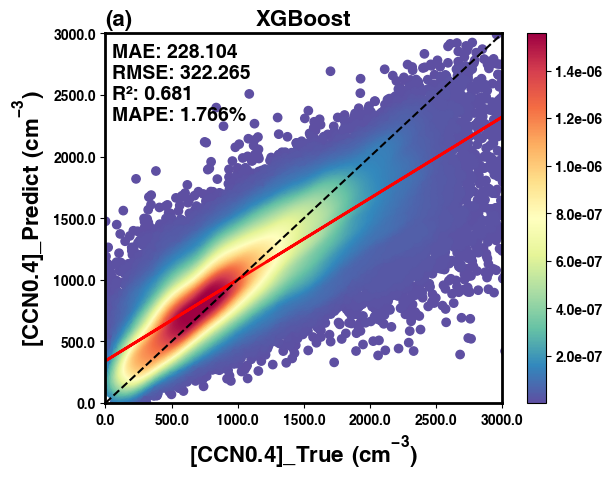

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10)  
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Helvetica')  

    return ax

x = y_test
y = y_pred_xgb

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--') 
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
MAPE = mean_absolute_percentage_error(x, y)
text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}\nMAPE: {MAPE:.3f}%'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Helvetica', fontweight='bold')
plt.yticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('(a)', loc='left', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('XGBoost', fontsize=16, fontname='Helvetica', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.text(50,2300, text, fontsize=14, fontname='Helvetica')
plt.savefig('E:/aabc/summary/fig-240820/xgb.png',dpi=600,bbox_inches='tight',pad_inches=0)
plt.show()


## <a id='toc2_2_'></a>[LightGBM](#toc0_)

### <a id='toc2_2_1_'></a>[model](#toc0_)

In [8]:
import lightgbm as lgb
import time
start_time_train = time.time()
lightgbm_model = lgb.LGBMRegressor(random_state=2024)  
lightgbm_model.fit(X_train, y_train)  
end_time_train = time.time()

train_time = end_time_train - start_time_train
print(f"time: {train_time} s")

y_pred_lgbm = lightgbm_model.predict(X_test)  
y_pred_lgbm



Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "e:\Anaconda3\envs\ICM\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "e:\Anaconda3\envs\ICM\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "e:\Anaconda3\envs\ICM\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\Anaconda3\envs\ICM\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 258384, number of used features: 25
[LightGBM] [Info] Start training from score 1007.511083
time: 1.0119986534118652 s


array([1392.80178207,  557.97791036, 1328.63458667, ...,  934.4235393 ,
       1394.37492726, 1672.53403592])

### <a id='toc2_2_2_'></a>[model evaluation](#toc0_)

In [9]:
mse = mean_squared_error(y_test,y_pred_lgbm)
y_test = y_test.ravel()
y_pred_lgbm = y_pred_lgbm.ravel()
mae = np.mean(np.abs(y_test - y_pred_lgbm))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_lgbm) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_lgbm)
print("R-squared (R2): {:.3f}".format(r2))

MAE: 252.316
RMSE: 350.491
R-squared (R2): 0.623


### <a id='toc2_2_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


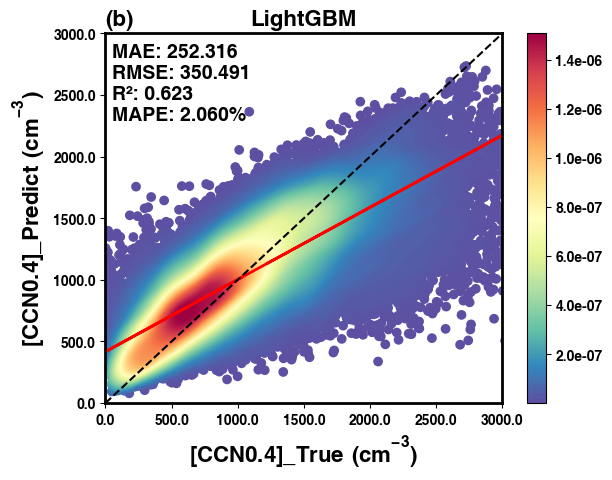

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10)  
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Helvetica')  

    return ax

x = y_test
y = y_pred_lgbm

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
MAPE = mean_absolute_percentage_error(x, y)
text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}\nMAPE: {MAPE:.3f}%'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Helvetica', fontweight='bold')
plt.yticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('(b)', loc='left', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('LightGBM', fontsize=16, fontname='Helvetica', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.text(50,2300, text, fontsize=14, fontname='Helvetica')
plt.savefig('E:/aabc/summary/fig-240820/light.png',dpi=600,bbox_inches='tight',pad_inches=0)

plt.show()


## <a id='toc2_3_'></a>[RF](#toc0_)

### <a id='toc2_3_1_'></a>[model](#toc0_)

In [11]:
from sklearn.ensemble import RandomForestRegressor 
import time
start_time_train = time.time()
random_forest_model = RandomForestRegressor(random_state=2024)  
random_forest_model.fit(X_train, y_train)

end_time_train = time.time()

train_time = end_time_train - start_time_train
print(f"time: {train_time} s")

y_pred_rf = random_forest_model.predict(X_test) 
y_pred_rf

time: 3294.716767311096 s


array([1657.33714175,  659.45128926, 1315.576989  , ...,  804.6947753 ,
       1656.3574886 , 1493.36606778])

### <a id='toc2_3_2_'></a>[model evaluation](#toc0_)

In [12]:
mse = mean_squared_error(y_test, y_pred_rf)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_rf = y_pred_rf.ravel()
mae = np.mean(np.abs(y_test - y_pred_rf))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_rf) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_rf)
print("R-squared (R2): {:.3f}".format(r2))


MSE: 63251.131
MAE: 160.343
RMSE: 251.498
R-squared (R2): 0.806


### <a id='toc2_3_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


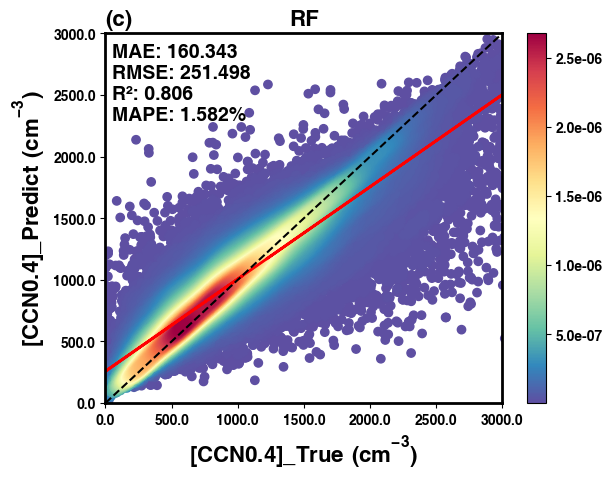

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'


def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10)
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Helvetica')  

    return ax

x = y_test
y = y_pred_rf

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')  
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
MAPE = mean_absolute_percentage_error(x, y)
text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}\nMAPE: {MAPE:.3f}%'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Helvetica', fontweight='bold')
plt.yticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('(c)', loc='left', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('RF', fontsize=16, fontname='Helvetica', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2300, text, fontsize=14, fontname='Helvetica')
plt.savefig('E:/aabc/summary/fig-240820/rf.png',dpi=600,bbox_inches='tight',pad_inches=0)

plt.show()


## <a id='toc2_4_'></a>[our model](#toc0_)

### <a id='toc2_4_1_'></a>[model](#toc0_)

In [14]:
# Make sure the model is trained
opt_xgb_best_params = np.load('E:/aabc/myDeepTree/data-240806/sgpxgb.npy', allow_pickle=True).item()
opt_rf_best_params = np.load('E:/aabc/myDeepTree/data-240806/sgprf.npy', allow_pickle=True).item()
opt_cb_best_params = np.load('E:/aabc/myDeepTree/data-240806/sgpcb.npy', allow_pickle=True).item()
opt_xgb_best_params

OrderedDict([('colsample_bytree', 0.9809574345089674),
             ('learning_rate', 0.018185223614203848),
             ('max_depth', 17),
             ('n_estimators', 994),
             ('random_state', 2024),
             ('subsample', 0.9431267253629235)])

In [15]:
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor  
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import time

start_time_train = time.time()

xgb_best = XGBRegressor(**opt_xgb_best_params, n_jobs=-1)
rf_best = RandomForestRegressor(**opt_rf_best_params, n_jobs=-1)
cb_best = CatBoostRegressor(**opt_cb_best_params, verbose=0)

ensemble_model = VotingRegressor(estimators=[
    ('xgb', xgb_best),
    ('rf', rf_best),
    ('cb', cb_best)
])

ensemble_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"time: {train_time} s")
predictions = ensemble_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

time: 4387.48729801178 s
Mean Squared Error: 53280.32269208854


### <a id='toc2_4_2_'></a>[model evaluation](#toc0_)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

ensemble_mae = mean_absolute_error(y_test, predictions)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, predictions))
ensemble_r2 = r2_score(y_test, predictions)


print("Ensemble Model Performance:")
print(f"MAE: {ensemble_mae}")
print(f"RMSE: {ensemble_rmse}")
print(f"R2: {ensemble_r2}")

Ensemble Model Performance:
MAE: 148.89633295161212
RMSE: 230.82530773745012
R2: 0.8363115426884161


### <a id='toc2_4_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


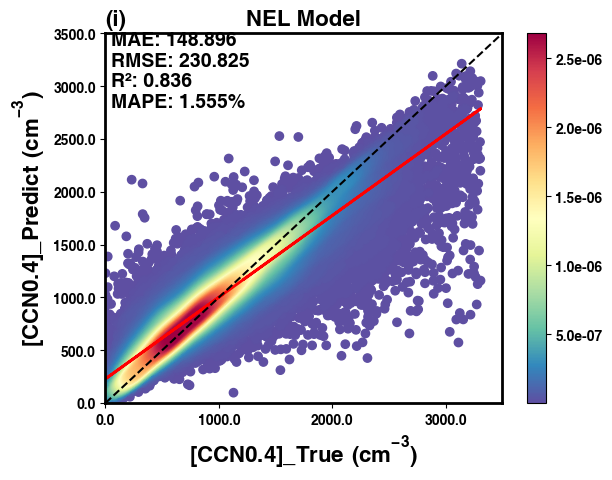

In [17]:

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'


def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10)  
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Helvetica') 

    return ax


x = y_test
y = predictions

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3500], [0, 3500], 'black', lw=1.5, linestyle='--')  # 1:1
plt.axis([0, 3500, 0, 3500])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
MAPE = mean_absolute_percentage_error(x, y)
text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}\nMAPE: {MAPE:.3f}%'
plt.yticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('(i)', loc='left', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('NEL Model', fontsize=16, fontname='Helvetica', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.text(50,2800, text, fontsize=14, fontname='Helvetica')
plt.savefig('E:/aabc/summary/fig-240820/NEL.png',dpi=300,bbox_inches='tight',pad_inches=0)

plt.show()


## <a id='toc2_5_'></a>[CatBoost](#toc0_)

### <a id='toc2_5_1_'></a>[model](#toc0_)

In [18]:
import time
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression

# CatBoost
start_time_train = time.time()
catboost_model = CatBoostRegressor(random_state=2024, verbose=0)
catboost_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"CatBoost time: {train_time} s")
y_pred_catboost = catboost_model.predict(X_test)



CatBoost time: 25.787155151367188 s


### <a id='toc2_5_2_'></a>[model evaluation](#toc0_)

In [19]:
mse = mean_squared_error(y_test, y_pred_catboost)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_catboost = y_pred_catboost.ravel()
mae = np.mean(np.abs(y_test - y_pred_catboost))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_catboost) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_catboost)
print("R-squared (R2): {:.3f}".format(r2))


MSE: 101526.140
MAE: 226.737
RMSE: 318.632
R-squared (R2): 0.688


### <a id='toc2_5_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


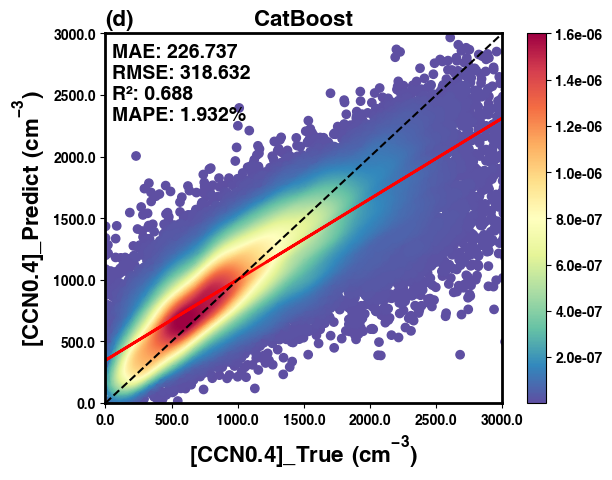

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Helvetica')  

    return ax
x = y_test
y = y_pred_catboost

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')  # 画1:1线
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
MAPE = mean_absolute_percentage_error(x, y)
text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}\nMAPE: {MAPE:.3f}%'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Helvetica', fontweight='bold')
plt.yticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('(d)', loc='left', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('CatBoost', fontsize=16, fontname='Helvetica', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2300, text, fontsize=14, fontname='Helvetica')
plt.savefig('E:/aabc/summary/fig-240820/cb.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()


## <a id='toc2_6_'></a>[SVM](#toc0_)

### <a id='toc2_6_1_'></a>[model](#toc0_)

In [21]:
# SVM
start_time_train = time.time()
svm_model = SVR()
svm_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"SVM time: {train_time} s")
y_pred_svm = svm_model.predict(X_test)



SVM time: 9681.617528438568 s


### <a id='toc2_6_2_'></a>[model evaluation](#toc0_)

In [22]:
mse = mean_squared_error(y_test, y_pred_svm)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_svm = y_pred_svm.ravel()
mae = np.mean(np.abs(y_test - y_pred_svm))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_svm) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_svm)
print("R-squared (R2): {:.3f}".format(r2))

MSE: 252004.832
MAE: 355.787
RMSE: 502.001
R-squared (R2): 0.226


### <a id='toc2_6_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


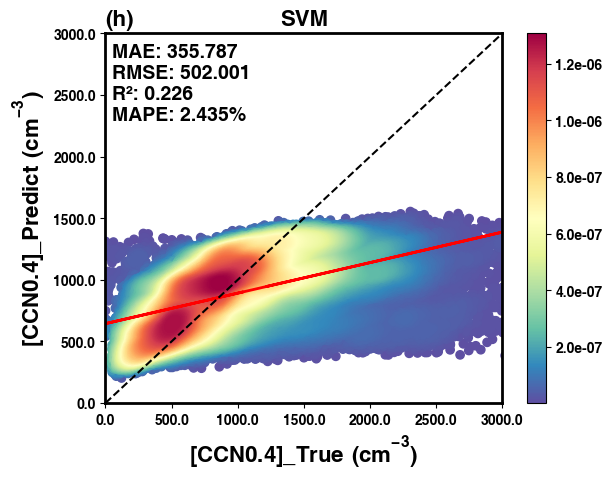

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Helvetica')  

    return ax
x = y_test
y = y_pred_svm

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')  # 画1:1线
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
MAPE = mean_absolute_percentage_error(x, y)
text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}\nMAPE: {MAPE:.3f}%'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Helvetica', fontweight='bold')
plt.yticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('(h)', loc='left', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('SVM', fontsize=16, fontname='Helvetica', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2300, text, fontsize=14, fontname='Helvetica')
plt.savefig('E:/aabc/summary/fig-240820/SVM.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()


## <a id='toc2_7_'></a>[DT](#toc0_)

### <a id='toc2_7_1_'></a>[model](#toc0_)

In [24]:
# 决策树
start_time_train = time.time()
dt_model = DecisionTreeRegressor(random_state=2024)
dt_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"time: {train_time} s")
y_pred_dt = dt_model.predict(X_test)




time: 31.43935251235962 s


### <a id='toc2_7_2_'></a>[model evaluation](#toc0_)

In [25]:
mse = mean_squared_error(y_test, y_pred_dt)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_dt = y_pred_dt.ravel()
mae = np.mean(np.abs(y_test - y_pred_dt))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_dt) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_dt)
print("R-squared (R2): {:.3f}".format(r2))

MSE: 139181.106
MAE: 201.363
RMSE: 373.070
R-squared (R2): 0.572


### <a id='toc2_7_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


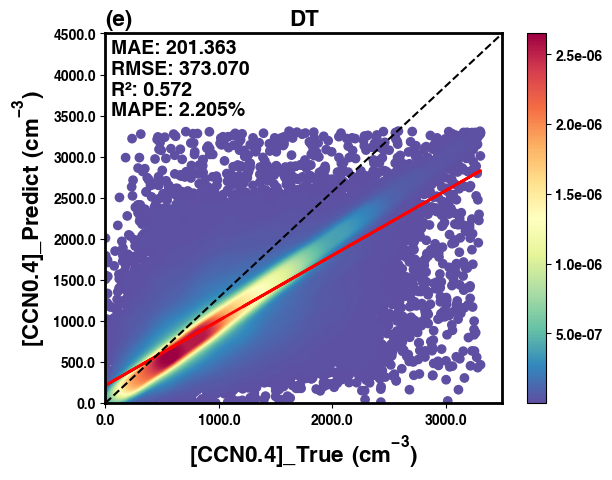

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Helvetica')  

    return ax
x = y_test
y = y_pred_dt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3500], [0, 4500], 'black', lw=1.5, linestyle='--')  # 画1:1线
plt.axis([0, 3500, 0, 4500])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
MAPE = mean_absolute_percentage_error(x, y)
text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}\nMAPE: {MAPE:.3f}%'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Helvetica', fontweight='bold')
plt.yticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('(e)', loc='left', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('DT', fontsize=16, fontname='Helvetica', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,3500, text, fontsize=14, fontname='Helvetica')
plt.savefig('E:/aabc/summary/fig-240820/DT.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()


## <a id='toc2_8_'></a>[AdaBoost-LR](#toc0_)

### <a id='toc2_8_1_'></a>[model](#toc0_)

In [27]:
# AdaBoost-LR
start_time_train = time.time()
adaboost_lr_model = AdaBoostRegressor(base_estimator=LinearRegression(), random_state=2024)
adaboost_lr_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"AdaBoost-LR time: {train_time} s")
y_pred_adaboost_lr = adaboost_lr_model.predict(X_test)



`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


AdaBoost-LR time: 4.85811185836792 s


### <a id='toc2_8_2_'></a>[model evaluation](#toc0_)

In [28]:
mse = mean_squared_error(y_test, y_pred_adaboost_lr)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_adaboost_lr = y_pred_adaboost_lr.ravel()
mae = np.mean(np.abs(y_test - y_pred_adaboost_lr))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_adaboost_lr) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_adaboost_lr)
print("R-squared (R2): {:.3f}".format(r2))

MSE: 221405.238
MAE: 385.423
RMSE: 470.537
R-squared (R2): 0.320


### <a id='toc2_8_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


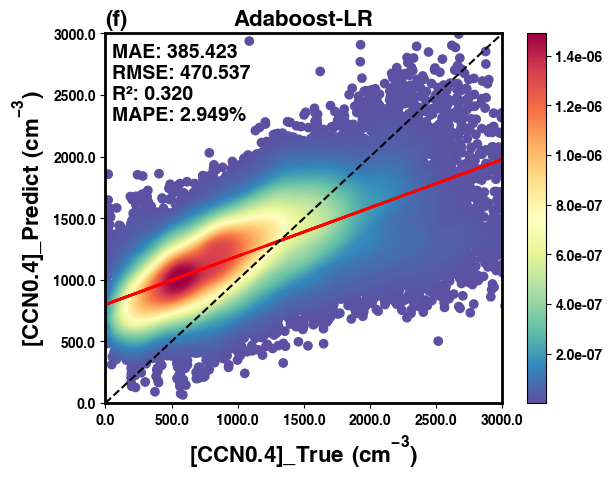

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Helvetica')  

    return ax
x = y_test
y = y_pred_adaboost_lr

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')  # 画1:1线
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
MAPE = mean_absolute_percentage_error(x, y)
text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}\nMAPE: {MAPE:.3f}%'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Helvetica', fontweight='bold')
plt.yticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('(f)', loc='left', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('Adaboost-LR', fontsize=16, fontname='Helvetica', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2300, text, fontsize=14, fontname='Helvetica')
plt.savefig('E:/aabc/summary/fig-240820/Adaboost-LR.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()


## <a id='toc2_9_'></a>[Bagging-SVM](#toc0_)

### <a id='toc2_9_1_'></a>[model](#toc0_)

In [30]:
# Bagging-SVM
start_time_train = time.time()
bagging_svm_model = BaggingRegressor(base_estimator=SVR(), random_state=2024)
bagging_svm_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"Bagging-SVM time: {train_time} s")
y_pred_bagging_svm = bagging_svm_model.predict(X_test)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Bagging-SVM time: 36731.78383612633 s


### <a id='toc2_9_2_'></a>[model evaluation](#toc0_)

In [31]:
mse = mean_squared_error(y_test, y_pred_bagging_svm)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_bagging_svm = y_pred_bagging_svm.ravel()
mae = np.mean(np.abs(y_test - y_pred_bagging_svm))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_bagging_svm) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_bagging_svm)
print("R-squared (R2): {:.3f}".format(r2))

MSE: 251975.718
MAE: 355.817
RMSE: 501.972
R-squared (R2): 0.226


### <a id='toc2_9_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


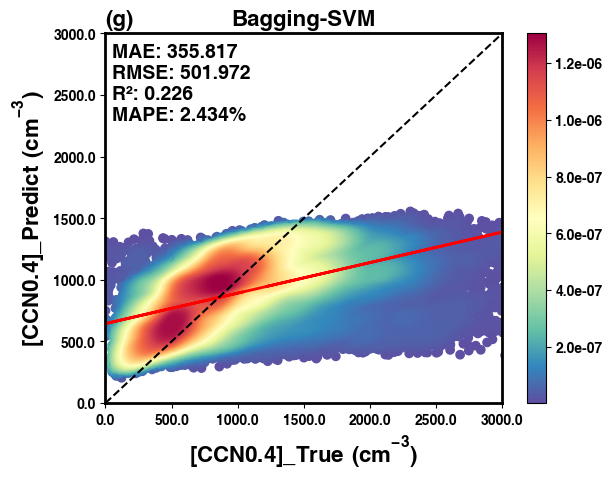

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Helvetica')  

    return ax
x = y_test
y = y_pred_bagging_svm

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--') 
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
MAPE = mean_absolute_percentage_error(x, y)
text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}\nMAPE: {MAPE:.3f}%'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Helvetica', fontweight='bold')
plt.yticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xticks(fontsize=10, fontname='Helvetica', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Helvetica', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('(g)', loc='left', fontsize=16, fontname='Helvetica', fontweight='bold')
plt.title('Bagging-SVM', fontsize=16, fontname='Helvetica', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2300, text, fontsize=14, fontname='Helvetica')
plt.savefig('E:/aabc/summary/fig-240820/Bagging-SVM.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()
